# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-03-27 00:49:14--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-27 00:49:14--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [3]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [2]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
print("\nInformación sobre los tipos de datos:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Información sobre los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None

Estadísticas descriptivas:
       invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN        

las columnas criticas de segmentación son: age, gender, category (estos representan las agrupaciones de segmentacion demografica la cual es importante para conocer de que manera nos dirigimos y a quien, y categoria ya que siendo una segmentacion conductual nos enseña los habitos de compra y frecuencias) y finalmente el shopping mall (trafico de ciertos clientes)

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
print("\nValores nulos:")
print(df.isnull().sum())

print("\nDuplicados:")
print(df.duplicated().sum())


Valores nulos:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Duplicados:
0


Las variables que afectan la calidad de los datos son valores nulos como la edad o los metodos de pago y los que son duplicados como ID de clientes, una manera para subsanarlo podria ser  para los valores nulos seria rellenar con valores promedio, valores mas comunes o eliminar la fila depende de el valor nulo en el database y para los valores duplicados eliminarlos.

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [7]:
df['total_value'] = df['quantity'] * df['price']

Frecuencia de compra
Categoria mas comprada
Ticket promedio

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

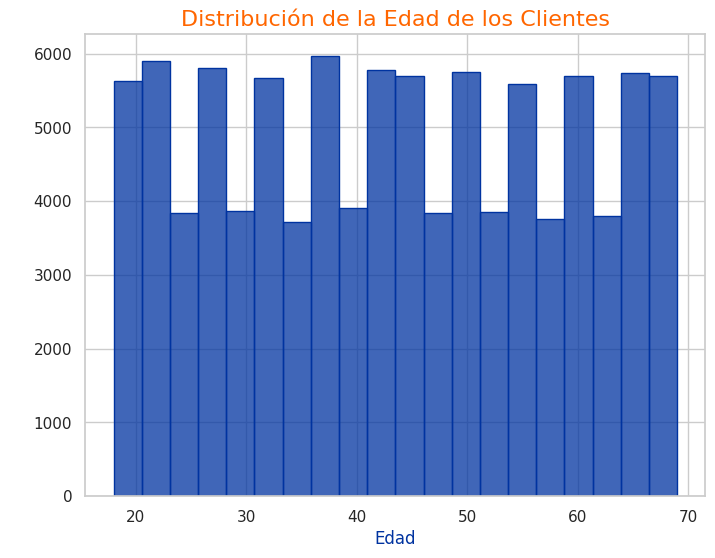

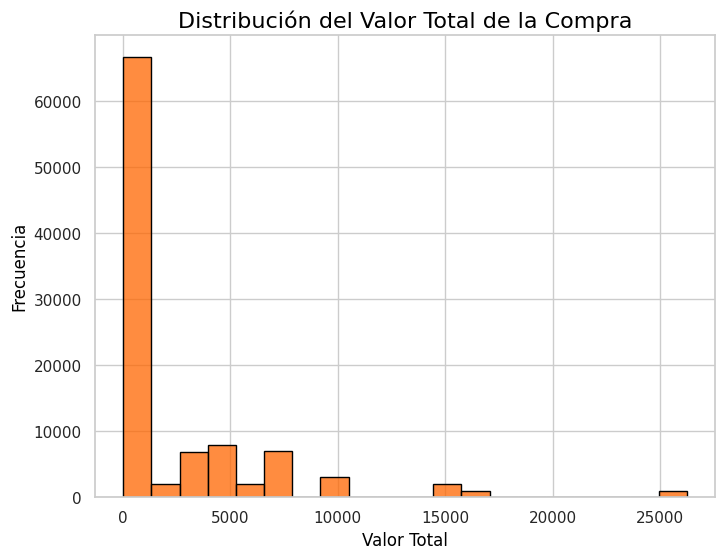

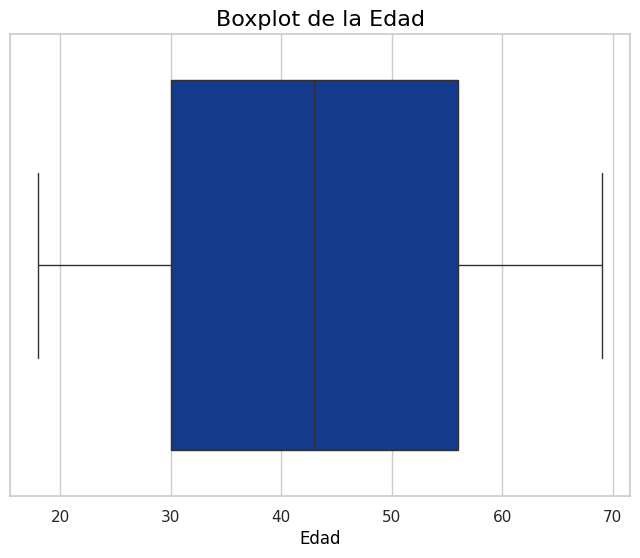

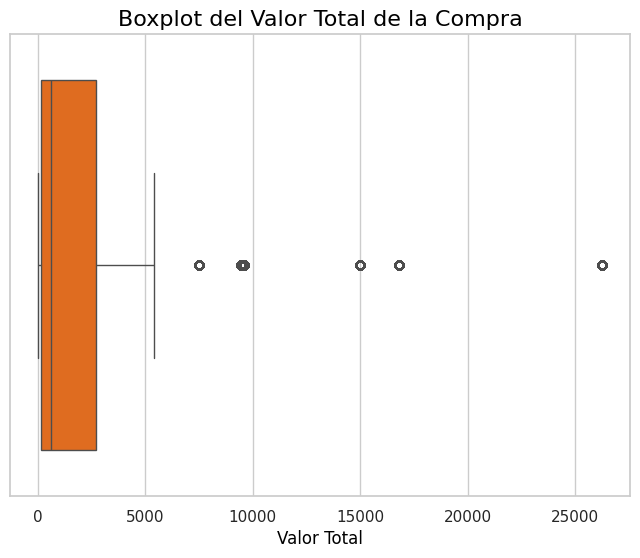

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, color=corporate_colors[0], edgecolor='#0033A0')
plt.title('Distribución de la Edad de los Clientes', fontsize=16, color='#FF6600')
plt.xlabel('Edad', fontsize=12, color='#0033A0')
plt.ylabel('Frecuencia', fontsize=12, color='#FFFFFF')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['total_value'], bins=20, color=corporate_colors[1], edgecolor='black')
plt.title('Distribución del Valor Total de la Compra', fontsize=16, color='black')
plt.xlabel('Valor Total', fontsize=12, color='black')
plt.ylabel('Frecuencia', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color=corporate_colors[0])
plt.title('Boxplot de la Edad', fontsize=16, color='black')
plt.xlabel('Edad', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_value'], color=corporate_colors[1])
plt.title('Boxplot del Valor Total de la Compra', fontsize=16, color='black')
plt.xlabel('Valor Total', fontsize=12, color='black')
plt.show()


Los clientes van entre 20 y 50 años, con posible movimiento a edades avanzadas. En el valor total de compra hay una distribución sesgada a la derecha con compras altas.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [12]:
bins = [18, 30, 50, 100]
bins = [18, 30, 50, 100]
labels = ['Jóvenes', 'Adultos', 'Mayores']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
segment_demographics = df.groupby(['age_group', 'gender'])['customer_id'].count().unstack()
print(segment_demographics)




gender     Female   Male
age_group               
Jóvenes     14911  10113
Adultos     22960  15372
Mayores     21611  14490


<ipython-input-12-3462538063dc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_demographics = df.groupby(['age_group', 'gender'])['customer_id'].count().unstack()


Las campañas deben enfocarse en redes sociales y descuentos cuando hablamos de jóvenes. Fidelización y beneficios exclusivos para adultos, y finalmente confianza y calidad para mayores.
Utilizaremos las campañas y medios adecuados para llegar a ellos segun sus habitos y nuestos objetivos.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [19]:
segment_category = df.groupby(['customer_id', 'category'])['total_value'].sum().unstack().fillna(0)
segment_category = df.groupby(['customer_id', 'category'])['total_value'].sum().unstack().fillna(0)
segment_payment = df.groupby(['customer_id', 'payment_method'])['total_value'].sum().unstack().fillna(0)
segment_mall = df.groupby(['customer_id', 'shopping_mall'])['total_value'].sum().unstack().fillna(0)
print(segment_category.head())
print(segment_payment.head())
print(segment_mall.head())


category     Books  Clothing  Cosmetics  Food & Beverage    Shoes  Souvenir  \
customer_id                                                                   
C100004        0.0    7502.0        0.0             0.00     0.00       0.0   
C100005        0.0       0.0        0.0             0.00  2400.68       0.0   
C100006        0.0       0.0        0.0             0.00     0.00       0.0   
C100012        0.0       0.0        0.0           130.75     0.00       0.0   
C100019        0.0       0.0        0.0             0.00     0.00       0.0   

category     Technology    Toys  
customer_id                      
C100004             0.0    0.00  
C100005             0.0    0.00  
C100006             0.0  322.56  
C100012             0.0    0.00  
C100019             0.0   35.84  
payment_method     Cash  Credit Card  Debit Card
customer_id                                     
C100004            0.00      7502.00         0.0
C100005         2400.68         0.00         0.0
C100006     

Las compras de Clothing y Shoes con Credit Card en Metrocity y Mall of Istanbul son las más importantes. Se deben enfocar en promociones y descuentos  para este segmento.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

<ipython-input-23-32277d616514>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_segment = df.groupby(['age_group', 'category'])['total_value'].sum().unstack()


category       Books     Clothing   Cosmetics  Food & Beverage        Shoes  \
age_group                                                                     
Jóvenes    217447.95  28719456.48  1671004.02        211663.33  16986011.34   
Adultos    317059.20  43688347.12  2629238.24        330473.24  25652466.14   
Mayores    300045.75  41588987.44  2492620.64        307398.48  23914973.99   

category    Souvenir  Technology        Toys  
age_group                                     
Jóvenes    162049.95  14050050.0  1029719.04  
Adultos    243937.08  22785000.0  1503738.88  
Mayores    229837.62  21027300.0  1446968.32  


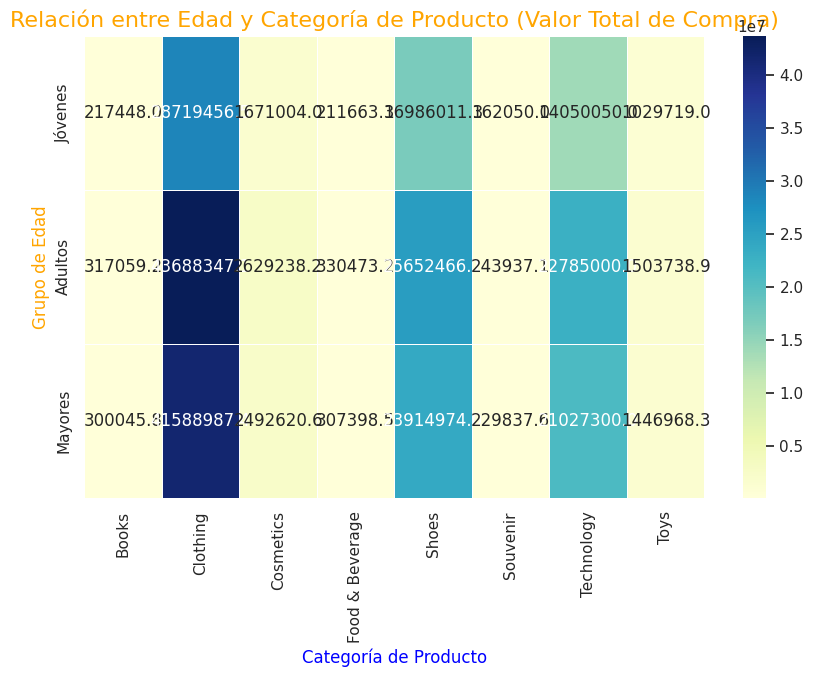

payment_method         Cash  Credit Card   Debit Card
gender                                               
Female          67573638.45  52875809.90  29757687.67
Male            45258604.57  35201313.87  20838739.79


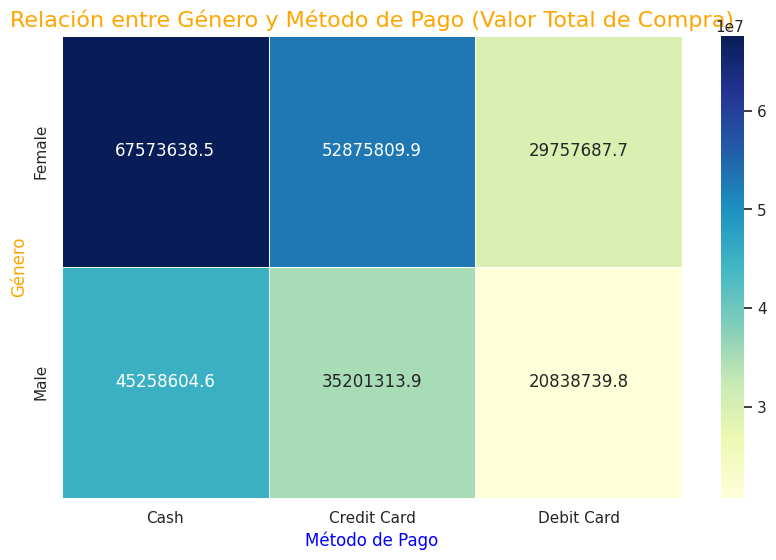

In [23]:
age_category_segment = df.groupby(['age_group', 'category'])['total_value'].sum().unstack()
print(age_category_segment)

plt.figure(figsize=(10, 6))
sns.heatmap(age_category_segment, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Relación entre Edad y Categoría de Producto (Valor Total de Compra)', fontsize=16, color='orange')
plt.xlabel('Categoría de Producto', fontsize=12, color='blue')
plt.ylabel('Grupo de Edad', fontsize=12, color='orange')
plt.show()

gender_payment_segment = df.groupby(['gender', 'payment_method'])['total_value'].sum().unstack()
print(gender_payment_segment)

plt.figure(figsize=(10, 6))
sns.heatmap(gender_payment_segment, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Relación entre Género y Método de Pago (Valor Total de Compra)', fontsize=16, color='orange')
plt.xlabel('Método de Pago', fontsize=12, color='blue')
plt.ylabel('Género', fontsize=12, color='orange')
plt.show()

Los segmentos de alto valor son categoría, método de pago y ubicación.
Adultos con tarjeta de crédito en Clothing y Shoes indican alto gasto.
Jóvenes en Electronics con débito, potencial de crecimiento.
Clientes de Metrocity y Mall of Istanbul, alto poder adquisitivo.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [24]:
category_counts = df['category'].value_counts()
print(category_counts)

low_volume_categories = category_counts[category_counts < 100].index.tolist()
df['category_grouped'] = df['category'].apply(lambda x: 'Otros' if x in low_volume_categories else x)

category_grouped_counts = df['category_grouped'].value_counts()
category_grouped_counts

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


,count
category_grouped,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


Agruparía Tecnología, Electrónicos y Videojuegos en Tecnología/Entretenimiento facilitando el análisis y las tendencias de consumo.
Tambien, Clothing y Shoes en Moda, ya que comparten un público similar y estrategias de marketing alineadas.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [32]:
df['combined_segment'] = df['age_group'].astype(str) + '_' + df['category_grouped'].astype(str) + '_' + df['shopping_mall'].astype(str)
combined_segment_analysis = df.groupby('combined_segment')['total_value'].agg(['mean', 'count'])
print(combined_segment_analysis)
combined_segment_analysis.sort_values('mean', ascending=False)


                                       mean  count
combined_segment                                  
Adultos_Books_Cevahir AVM        191.169079     76
Adultos_Books_Emaar Square Mall  184.072500    100
Adultos_Books_Forum Istanbul     160.500000    101
Adultos_Books_Istinye Park       164.867647    170
Adultos_Books_Kanyon             154.327437    359
...                                     ...    ...
Mayores_Toys_Mall of Istanbul    406.761188    707
Mayores_Toys_Metrocity           402.176886    578
Mayores_Toys_Metropol AVM        393.331380    355
Mayores_Toys_Viaport Outlet      411.594105    190
Mayores_Toys_Zorlu Center        380.384330    194

[240 rows x 2 columns]


,mean,count
combined_segment,,
Jóvenes_Technology_Viaport Outlet,13729.545455,66
Adultos_Technology_Cevahir AVM,12842.307692,91
Mayores_Technology_Zorlu Center,12830.136986,73
Jóvenes_Technology_Emaar Square Mall,12279.661017,59
Mayores_Technology_Kanyon,12192.452830,371
...,...,...
Jóvenes_Food & Beverage_Istinye Park,54.766981,371
Jóvenes_Food & Beverage_Forum Istanbul,52.802316,177
Mayores_Food & Beverage_Forum Istanbul,52.399430,263


                                       mean  count
combined_segment                                  
Adultos_Books_Cevahir AVM        191.169079     76
Adultos_Books_Emaar Square Mall  184.072500    100
Adultos_Books_Forum Istanbul     160.500000    101
Adultos_Books_Istinye Park       164.867647    170
Adultos_Books_Kanyon             154.327437    359
...                                     ...    ...
Mayores_Toys_Mall of Istanbul    406.761188    707
Mayores_Toys_Metrocity           402.176886    578
Mayores_Toys_Metropol AVM        393.331380    355
Mayores_Toys_Viaport Outlet      411.594105    190
Mayores_Toys_Zorlu Center        380.384330    194

[240 rows x 2 columns]


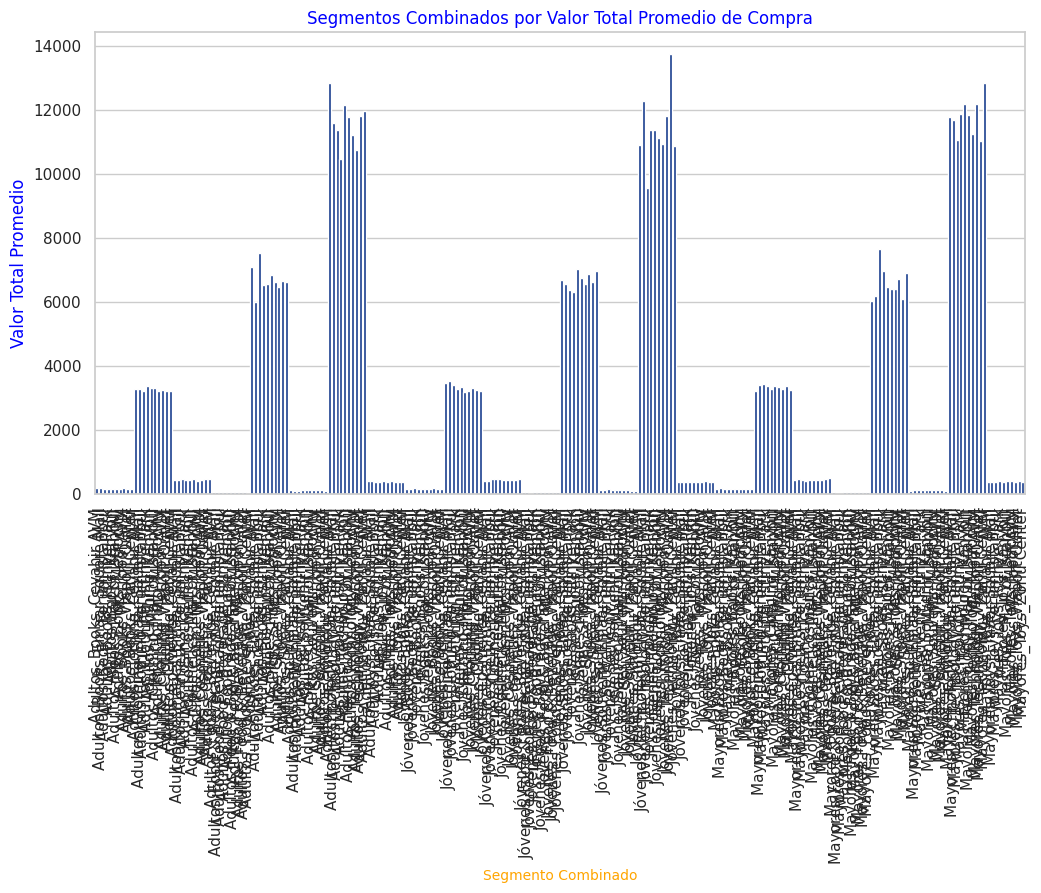

In [28]:
df['combined_segment'] = df['age_group'].astype(str) + '_' + df['category_grouped'].astype(str) + '_' + df['shopping_mall'].astype(str)
combined_segment_analysis = df.groupby('combined_segment')['total_value'].agg(['mean', 'count'])
print(combined_segment_analysis)
combined_segment_analysis.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=combined_segment_analysis.index, y=combined_segment_analysis['mean'])
plt.xticks(rotation=90)
plt.title('Segmentos Combinados por Valor Total Promedio de Compra', fontsize=12, color='blue')
plt.xlabel('Segmento Combinado', fontsize=10, color='orange')
plt.ylabel('Valor Total Promedio', fontsize=12, color='blue')
plt.show()

La combinación de edad, categoría reducida y shopping mall es la mas dificil, ya que segmenta segun intereses, hábitos de compra y ubicación preferida, facilitando estrategias de marketing.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [29]:
segment_avg_total_value = df.groupby('combined_segment')['total_value'].mean()
highest_avg_segment = segment_avg_total_value.idxmax()
highest_avg_value = segment_avg_total_value.max()

print(f"El segmento con el valor total promedio más alto es: {highest_avg_segment}")
print(f"El valor total promedio de este segmento es: {highest_avg_value}")

El segmento con el valor total promedio más alto es: Jóvenes_Technology_Viaport Outlet
El valor total promedio de este segmento es: 13729.545454545454


El segmento con el valor total promedio más alto es: Jóvenes_Technology_Viaport Outlet estrategias de descuentos y buscar una fidelizacion.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Análisis de Segmentos y Estrategias de Marketing

### 1. ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- **Adultos que compran Ropa y Zapatos con Tarjeta de Crédito**: Frecuentes y con alto valor de compra.  
- **Jóvenes que compran Electrónicos con Tarjeta de Débito**: Alto valor, pero pueden necesitar incentivos.  
- **Clientes en Metrocity y Mall of Istanbul**: Compradores recurrentes con gastos elevados.  

### 2. ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- Ofrecer **descuentos y promociones** para incentivar compras más grandes.  
- Implementar **programas de lealtad** para aumentar la frecuencia de compra.  
- Crear **paquetes o bundles** atractivos con precios más accesibles.  

### 3. ¿Cómo influye la categoría de producto y el centro comercial en el comportamiento de compra?
- **Categoría de producto**: Define la disposición a pagar y la frecuencia de compra (Ej: Electrónica = compras menos frecuentes pero de alto valor).  
- **Centro comercial**: Algunos tienen clientes con mayor poder adquisitivo y pueden influir en estrategias de precios y promociones.  

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

El enfoque ideal es de 3 a 5 segmentos clave, invirtiendo más en los de mayor valor y adaptando estrategias para los demás. El éxito se medirá con conversión, ticket promedio y frecuencia de compra.